# Exercise 1 - Data Gathering
## Scraping
Import
necessary
libraries
for this exercise:
    - requests
- BeautifulSoup(bs4)
- pandas

In [99]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
from debugpy.common.timestamp import current

Accessing website and gathering data from https://klimi.mk/.

In [36]:
response = requests.get("https://klimi.mk/")
response

<Response [200]>

In [37]:
print(response.text[:512])

<!doctype html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
                <meta property="fb:app_id" content="308558492587260" />
        <meta property="og:url" content="https://klimi.mk" />
        <meta property="og:image" content="https://klimi.mk/public/storage/main/fb.png" />
        <meta property="og:title" content="КЛИМИ.мк - резиденцијални и комерцијални клима уреди" />
        <meta property="og:type" content="artic


Using
Beautiful
Soup
to
parse
the
HTML
elements.

In [38]:
soup = BeautifulSoup(response.text, "html.parser")
print(soup.prettify()[:512])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="308558492587260" property="fb:app_id">
   <meta content="https://klimi.mk" property="og:url">
    <meta content="https://klimi.mk/public/storage/main/fb.png" property="og:image"/>
    <meta content="КЛИМИ.мк - резиденцијални и комерцијални клима уреди" property="og:title"/>
    <meta content="article" property="og:type"/>
    <meta content="KLIMI.MK | De



Selectors
- Selecting
element
by class(using a.) ex..sale


- Selecting
elements
by
id(using
a  #) ex. #product
- Selecting
elements
by
tag(using
tag
name) ex.p

Selecting
the
elements
by
the


class manufacturer(.proizvoditel).


In [39]:
manufacturer_elements = soup.select(".proizvoditel")

We
use
the
id
to
extract
the
exact
manufacturer.

In [40]:
manufacturers = [m.get("id") for m in manufacturer_elements]
print(manufacturers)

['gree', 'vivax', 'hisense', 'toshiba', 'tesla', 'carrier', 'haier', 'fujitsu', 'samsung', 'daikin', 'mitsubishi', 'aux', 'tosot', 'hitachi', 'hyundai', 'tcl', 'bosch', 'vaillant']


We
select
the
slider
element
on
the
top
of
the
page in order
to
access
the
elements
that
we
need
to
extraxt
information
from .

In [41]:
slider_element = soup.select_one('#slider')
print(str(slider_element)[:512])

<section id="slider"><!--slider-->
<div class="carousel slide div-slajder" data-ride="carousel" id="carousel-example-generic">
<!-- Indicators -->
<ol class="carousel-indicators">
<li class="active" data-slide-to="0" data-target="#carousel-example-generic"></li>
<li class="" data-slide-to="1" data-target="#carousel-example-generic"></li>
<li class="" data-slide-to="2" data-target="#carousel-example-generic"></li>
<li class="" data-slide-to="3" data-target="#carousel-example-generic"></li>
<li class="" data-


Next
we
select
the
image
elements
contained in the
slider in order
to
extract
the
image
urls.

In [42]:
image_elements = slider_element.select('img.img.img-fluid.slika-klima-slajder')
image_elements[:5]

[<img alt="" class="img img-fluid slika-klima-slajder" src="https://klimi.mk/public/storage/proizvodi/O2AnygmaFsCeFxo6M85Fd5WpkNSzDjJPMCTv3u9C.png"/>,
 <img alt="" class="img img-fluid slika-klima-slajder" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>,
 <img alt="" class="img img-fluid slika-klima-slajder" src="https://klimi.mk/public/storage/proizvodi/hiv5ww2PyxFlN0cyQTKvVaiQX0gKL8WkGfCNTq09.png"/>,
 <img alt="" class="img img-fluid slika-klima-slajder" src="https://klimi.mk/public/storage/proizvodi/VTsibO8WletY6YemkQ6hw8550ObFFV2ORKhEqPJb.png"/>,
 <img alt="" class="img img-fluid slika-klima-slajder" src="https://klimi.mk/public/storage/proizvodi/PDrEGeZDdN3ujtFob1VXKit59Ovh0sbIs71xwz96.png"/>]

Extracting
image
urls
into
a
separate
list.

In [43]:
image_urls = [img.get('src') for img in image_elements]
image_urls[0]

'https://klimi.mk/public/storage/proizvodi/O2AnygmaFsCeFxo6M85Fd5WpkNSzDjJPMCTv3u9C.png'


We
locate and inspect
the
container in the
website
where
all
the
product
data is gathered.

In [44]:
container = soup.select_one('.sodrzina-klimi-naslovna')
print(str(container)[:512])

<div class="sodrzina-klimi-naslovna">
<!-- -->
<div class="col-md-12 row klimi-red" id="proizvodi-data">
<div class="col-md-4 col-sm-6 klima-box ramka-promo-cena">
<div class="header-box">
<img alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>
</div>
<div class="proizvoditel-model">
<img align="left" alt="VIVAX" class="logo-box-klima" src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png"



Select
all
the
product
rows.

In [45]:
rows = soup.select('.klimi-red')
print(len(rows))
print(str(rows)[:512])

2
[<div class="col-md-12 row klimi-red" id="proizvodi-data">
<div class="col-md-4 col-sm-6 klima-box ramka-promo-cena">
<div class="header-box">
<img alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>
</div>
<div class="proizvoditel-model">
<img align="left" alt="VIVAX" class="logo-box-klima" src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png"/>
<span class="opis-model">ACP-12CH35AEFIs R3



Extracting
all
the
cells
from the rows.

In [46]:
cells = []
for row in rows:
    cells += row.select(".klima-box")

len(cells)
print(cells[0])

<div class="col-md-4 col-sm-6 klima-box ramka-promo-cena">
<div class="header-box">
<img alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>
</div>
<div class="proizvoditel-model">
<img align="left" alt="VIVAX" class="logo-box-klima" src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png"/>
<span class="opis-model">ACP-12CH35AEFIs R32</span>
</div>
<div class="osnovni-podatoci-div">
<span class="osnovni-info"><b>ТИП</b>: ИНВЕРТЕР СПЛИТ СИСТЕМ</span>
<span class="osnovni-info"><b>ЕНЕРГЕТСКА КЛАСА</b>: A++ </span>
<span class="osnovni-info"><b>МОЌНОСТ</b>: 3517/3810 W</span>
<span class="osnovni-info"><b>ГРЕЕЊЕ / ЛАДЕЊЕ</b>: ОД -10℃ ДО 50℃</span>
<span class="osnovni-info"><b>ПРЕПОРАЧАНА ПОВРШИНА</b>: <span style="color: #090037;">ДО 30 м<sup>2</sup></span></span>
<span class="osnovni-info info-funkcii" title="Внесете свежина во вашите домашни и деловни простории и во нај


Select
the
brand
name and the
description
of
every
AC
unit.


In [47]:
def get_manufacturer_and_model(cell):
    manufacturer_details = cell.select_one(".proizvoditel-model")
    manufacturer = manufacturer_details.select_one("img").get("alt")
    model = manufacturer_details.select_one(".opis-model").text
    return {
        "manufacturer": manufacturer,
        "model": model,
    }

In [48]:
get_manufacturer_and_model(cells[0])

{'manufacturer': 'VIVAX', 'model': 'ACP-12CH35AEFIs R32'}


Extracting
properties
from all the differentcells.
1. Define
all
the
property
names
2. Function
to
extraxt
properties and sort
them in a
dictionary

In [49]:
names = [
    "type",
    "energy_class",
    "power",
    "temperature",
    "area",
    "functions",
    "warranty"
]

In [50]:
def get_properties(cell):
    properties = cell.select(".osnovni-info")

    values = {}
    for index in range(len(names)):
        values[names[index]] = properties[index].text.split(": ")[1].strip()

    return values


Testing
the
get_properties
function with the first cell:

In [51]:
get_properties(cells[0])

{'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
 'energy_class': 'A++',
 'power': '3517/3810 W',
 'temperature': 'ОД -10℃ ДО 50℃',
 'area': 'ДО 30 м2',
 'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
 'warranty': '5 ГОДИНИ'}


Extracting the prices from the cells.
1. Extraxt
the
current
price
2. Extract
the
previous
price if the
unit
has
a
discount


In [52]:
def get_prices(cell):
    current = cell.select_one(".cena-box-naslovna").contents[0]
    previous_element = cell.select_one(".stara-cena-linija")
    if previous_element is not None:
        return {"current": current, "previous": previous_element.contents[0]}
    else:
        return {"current": current, "previous": None}


Testing
get_prices
function
with the first cell:

In [53]:
get_prices(cells[0])

{'current': '17.990', 'previous': '20.990'}

In [54]:
def extraxt_all_data(cell):
    dictionary = {}

    manufacturer_data = get_manufacturer_and_model(cell)
    dictionary.update(manufacturer_data)

    property_data = get_properties(cell)
    dictionary.update(property_data)

    price_data = get_prices(cell)
    dictionary.update(price_data)

    return dictionary



Testing
the
function
extract_all_data
with the first cell:

In [55]:
extraxt_all_data(cells[0])

{'manufacturer': 'VIVAX',
 'model': 'ACP-12CH35AEFIs R32',
 'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
 'energy_class': 'A++',
 'power': '3517/3810 W',
 'temperature': 'ОД -10℃ ДО 50℃',
 'area': 'ДО 30 м2',
 'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
 'warranty': '5 ГОДИНИ',
 'current': '17.990',
 'previous': '20.990'}

Collecting
all
the
data
from the cells.
1. Make
a
for loop that cycles through the cells
2. Call
the
function
extract_all_data
on
the
cells and add
that
to
the
data list

In [56]:
data = []
for cell in cells:
    data.append(extraxt_all_data(cell))
print(data)

[{'manufacturer': 'VIVAX', 'model': 'ACP-12CH35AEFIs R32', 'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ', 'energy_class': 'A++', 'power': '3517/3810 W', 'temperature': 'ОД -10℃ ДО 50℃', 'area': 'ДО 30 м2', 'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!', 'warranty': '5 ГОДИНИ', 'current': '17.990', 'previous': '20.990'}, {'manufacturer': 'TESLA', 'model': 'CLASSIC TA36FFLL-1232IA', 'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ', 'energy_class': 'A++', 'power': '3400/3500 W', 'temperature': 'ОД -15℃ ДО 49℃', 'area': 'ДО 35 м2', 'functions': '/', 'warranty': '3 ГОДИНИ', 'current': '18.990', 'previous': None}, {'manufacturer': 'VIVAX', 'model': 'ACP-12CH35AEXIs R32', 'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ', 'energy_class': 'A++', 'power': '3520/3810 W', 'temperature': 'ОД -15℃ ДО 50℃', 'area': 'ДО 30 м2', 'functions': '/', 'warranty': '5 ГОДИНИ', 'current': '19.990', 'previous': '24.990'}, {'manufacturer': 'VIVAX', 'model': 'ACP-09CH25AEQIS R32', 'type': 'ИНВЕРТЕР СПЛИТ СИСТ


Create
a
pandas
dataframe
from the collected data.

In [57]:
df = pd.DataFrame(data)
df

,manufacturer,model,type,energy_class,power,temperature,area,functions,warranty,current,previous
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -10℃ ДО 50℃,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3500 W,ОД -15℃ ДО 49℃,ДО 35 м2,/,3 ГОДИНИ,18.990,None
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3520/3810 W,ОД -15℃ ДО 50℃,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,2640 W,ОД 17℃ ДО 35℃,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,None
5,TOSOT,MUSE PREMIUM TWH12AFBXB-K6DNA5A,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3200/3400 W,ОД -15℃ ДО 43℃,ДО 30 м2,"Произведено од GREE. Самодијагноза, интелегент...",3 ГОДИНИ,19.990,31.990
6,VIVAX,ACP-09CH25AEMIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, самодијагноза, 1W standby, ...",5 ГОДИНИ,19.990,24.990
7,VIVAX,ACP-12CH35AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -15℃ ДО 50℃,ДО 35 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,20.990,25.990
8,TESLA,CLASSIC TT34EX21-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3420 W,ОД -20℃ ДО 53℃,ДО 35 м2,/,3 ГОДИНИ,20.990,25.990



## Selenium
Importing
libraries

In [58]:
import time

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By


Create
a
driver and link
it
to
the
website.

In [59]:
driver = Chrome()

In [60]:
driver.get("https://klimi.mk/")


Automating
page
scrolling in order
to
collect
data
displayed
on
the
page.

In [61]:
last_height = driver.execute_script("return document.body.scrollHeight;")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)
    new_height = driver.execute_script("return document.body.scrollHeight;")
    if new_height == last_height:
        break
    last_height = new_height

Get
the
grid
element and rows
that
contain
all
the
data
for the AC units.


In [62]:
grid_element = driver.find_element(By.CLASS_NAME, "sodrzina-klimi-naslovna")
row_elements = grid_element.find_elements(By.CLASS_NAME, "klimi-red")
len(row_elements)

2


Get
all
the
elements
from the rows as cells.

In [63]:
cells = []

for row in row_elements:
    curr_cells = row.find_elements(By.CLASS_NAME, "klima-box")
    cells.extend(curr_cells)
len(cells)

9

Find
the
current
price
of
the
AC
unit.

In [64]:
curr_price_element = cells[0].find_element(By.CLASS_NAME, "cena-box-naslovna")
curr_price = driver.execute_script("return arguments[0].firstChild.nodeValue", curr_price_element)
curr_price

'17.990'

Find
the
previous
price
of
the
AC
unit.

In [65]:
prev_price_element = cells[8].find_element(By.CLASS_NAME, "stara-cena-linija")
prev_price = driver.execute_script("return arguments[0].firstChild.nodeValue", prev_price_element)
prev_price

'25.990'

Extracting
all
the
data
with selenium.

In [66]:
data = []

for cell in cells:
    outer_html = cell.get_attribute("outerHTML")
    soup = BeautifulSoup(outer_html, "html.parser")
    data.append(extraxt_all_data(soup))

Print
the
first
element
of
the
data
list.
data[0]
Create
a
dataframe
from the gathered data.

In [67]:
df = pd.DataFrame(data)
df

,manufacturer,model,type,energy_class,power,temperature,area,functions,warranty,current,previous
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -10℃ ДО 50℃,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3500 W,ОД -15℃ ДО 49℃,ДО 35 м2,/,3 ГОДИНИ,18.990,None
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3520/3810 W,ОД -15℃ ДО 50℃,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,2640 W,ОД 17℃ ДО 35℃,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,None
5,TOSOT,MUSE PREMIUM TWH12AFBXB-K6DNA5A,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3200/3400 W,ОД -15℃ ДО 43℃,ДО 30 м2,"Произведено од GREE. Самодијагноза, интелегент...",3 ГОДИНИ,19.990,31.990
6,VIVAX,ACP-09CH25AEMIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, самодијагноза, 1W standby, ...",5 ГОДИНИ,19.990,24.990
7,VIVAX,ACP-12CH35AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -15℃ ДО 50℃,ДО 35 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,20.990,25.990
8,TESLA,CLASSIC TT34EX21-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3420 W,ОД -20℃ ДО 53℃,ДО 35 м2,/,3 ГОДИНИ,20.990,25.990


Create
a
CSV
file
from the gathered data.

In [69]:
df.to_csv("/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/LaboratoryExercises/Ex.1", index=False)

## Data Analysis

Importing
extra
libraries:
- re
for regular expressions
- numpy for numerical calculations
-  matplotlib.pyplot and seaborn
    for graphical representation of the data

In [70]:
import re
import matplotlib.pyplot as plt
import seaborn as sns


Processing
each
column
of
the
Dataframe
created
earlier.

In [72]:
df = pd.read_csv("/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/LaboratoryExercises/Ex.1", dtype=str)

In [73]:
df["manufacturer"].unique()

array(['VIVAX', 'TESLA', 'TOSOT'], dtype=object)

In [74]:
df["type"].unique()

array(['ИНВЕРТЕР СПЛИТ СИСТЕМ', 'МОБИЛНИ КЛИМА УРЕДИ'], dtype=object)

In [75]:
df["energy_class"].unique()

array(['A++', 'A'], dtype=object)

In [76]:
df["power"].unique()

array(['3517/3810 W', '3400/3500 W', '3520/3810 W', '2638/2930 W',
       '2640 W', '3200/3400 W', '3400/3420 W'], dtype=object)

In [77]:
df["temperature"].unique()

array(['ОД -10℃ ДО 50℃', 'ОД -15℃ ДО 49℃', 'ОД -15℃ ДО 50℃',
       'ОД 17℃ ДО 35℃', 'ОД -15℃ ДО 43℃', 'ОД -20℃ ДО 53℃'], dtype=object)

In [78]:
df["area"].unique()

array(['ДО 30 м2', 'ДО 35 м2', 'ДО 25 м2'], dtype=object)

In [79]:
df["functions"].unique()

array(['Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
       '/',
       'Висока ефикасност, прикажување на самодијагноза, индикатор за истекување на гасот за разладување, 1W standby, турбо, заштита на вентил на надворешна единица, интелегентно отопување, 12 Fan Speed, безшумна опција, двосмерен одвод на кондензат, дигитален екран.',
       'Тајмер, 3 стапки на проток на воздух, Рачно ракување, Повеќенасочни тркала.',
       'Произведено од GREE. Самодијагноза, интелегентно отопување, аuto restart, нормален sleep mode,тајмер, turbo',
       'Висока ефикасност, самодијагноза, 1W standby, заштита на вентил надворешна единица, 12 Fan Speed, self cleaning, индикатор за истекување на гасот за разладување, безшумна операција, двосмерен одвод на кондензат, дигитален екран, sleep mode, тајмер, интелегентно отопување, memory функција, турбо, припрема за Wi-Fi  ( WiFi ready )'],
      dtype=object)

In [80]:
df["warranty"].unique()

array(['5 ГОДИНИ', '3 ГОДИНИ'], dtype=object)

Convert
the
power
column
into
numbers.

In [81]:
def process_power(power):
    numbers = re.findall(r"\d+", power)
    if len(numbers) == 1:
        return numbers * 2
    else:
        return numbers

In [82]:
df[["min_power", "max_power"]] = df["power"].apply(process_power).tolist()
df["min_power"] = df["min_power"].astype(int)
df["max_power"] = df["max_power"].astype(int)
df.drop(columns=["power"], inplace=True)
df

,manufacturer,model,type,energy_class,temperature,area,functions,warranty,current,previous,min_power,max_power
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -10℃ ДО 50℃,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990,3517,3810
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -15℃ ДО 49℃,ДО 35 м2,/,3 ГОДИНИ,18.990,NaN,3400,3500
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -15℃ ДО 50℃,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990,3520,3810
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990,2638,2930
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,ОД 17℃ ДО 35℃,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,NaN,2640,2640
5,TOSOT,MUSE PREMIUM TWH12AFBXB-K6DNA5A,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -15℃ ДО 43℃,ДО 30 м2,"Произведено од GREE. Самодијагноза, интелегент...",3 ГОДИНИ,19.990,31.990,3200,3400
6,VIVAX,ACP-09CH25AEMIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, самодијагноза, 1W standby, ...",5 ГОДИНИ,19.990,24.990,2638,2930
7,VIVAX,ACP-12CH35AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -15℃ ДО 50℃,ДО 35 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,20.990,25.990,3517,3810
8,TESLA,CLASSIC TT34EX21-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -20℃ ДО 53℃,ДО 35 м2,/,3 ГОДИНИ,20.990,25.990,3400,3420



Converting
the
temperature
column
into
min_temp and max_temp
columns(numbers).

In [83]:
def process_temperature(temp):
    temps = re.findall(r"-?\d+", temp)
    return temps

In [84]:
df[["min_temp", "max_temp"]] = df["temperature"].apply(process_temperature).tolist()
df["min_temp"] = df["min_temp"].astype(int)
df["max_temp"] = df["max_temp"].astype(int)
df.drop(columns=["temperature"], inplace=True)
df

,manufacturer,model,type,energy_class,area,functions,warranty,current,previous,min_power,max_power,min_temp,max_temp
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990,3517,3810,-10,50
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 35 м2,/,3 ГОДИНИ,18.990,NaN,3400,3500,-15,49
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990,3520,3810,-15,50
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990,2638,2930,-15,50
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,NaN,2640,2640,17,35
5,TOSOT,MUSE PREMIUM TWH12AFBXB-K6DNA5A,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 30 м2,"Произведено од GREE. Самодијагноза, интелегент...",3 ГОДИНИ,19.990,31.990,3200,3400,-15,43
6,VIVAX,ACP-09CH25AEMIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 25 м2,"Висока ефикасност, самодијагноза, 1W standby, ...",5 ГОДИНИ,19.990,24.990,2638,2930,-15,50
7,VIVAX,ACP-12CH35AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 35 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,20.990,25.990,3517,3810,-15,50
8,TESLA,CLASSIC TT34EX21-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 35 м2,/,3 ГОДИНИ,20.990,25.990,3400,3420,-20,53


Converting
the
current and previous
price
data
from a string to
an
integer.

In [85]:
df["current"] = df["current"].apply(lambda price: price.replace(".", ""))
df["current"] = df["current"].astype(float)
df["previous"] = df["previous"].apply(lambda price: price.replace(".", "") if not pd.isna(price) else np.nan)
df["previous"] = df["previous"].astype(float)

## Data Visualisation
Histogram is used
to
how
current
prices
are
distributed.It
groups
the
elements in to
columns.Although
similar
to
a
graph
the
histogram
works
with continuous data.

<Axes: >

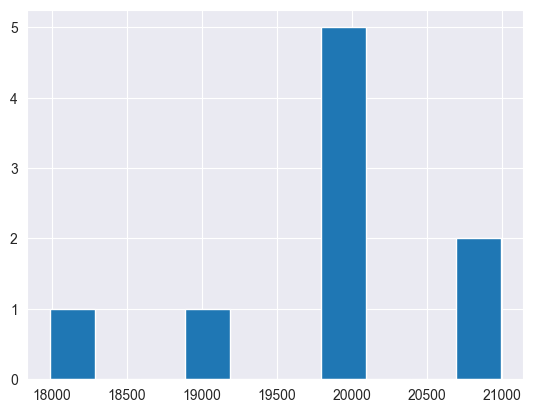

In [86]:
df["current"].hist()

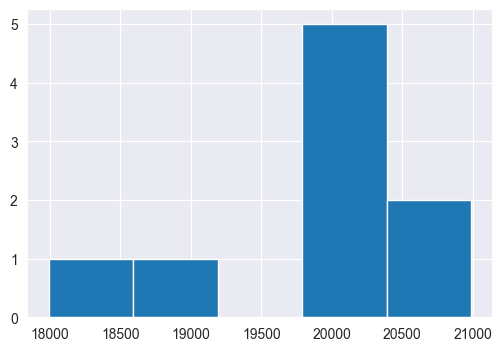

In [87]:
plt.figure(figsize=(6, 4))
plt.hist(df["current"], bins=5)
plt.show()

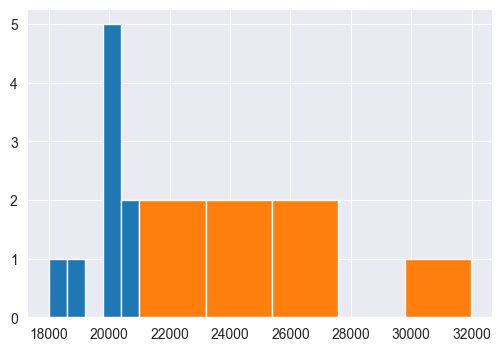

In [88]:
plt.figure(figsize=(6, 4))
plt.hist(df["current"], bins=5)
plt.hist(df["previous"], bins=5)
plt.show()

<Axes: xlabel='current', ylabel='Count'>

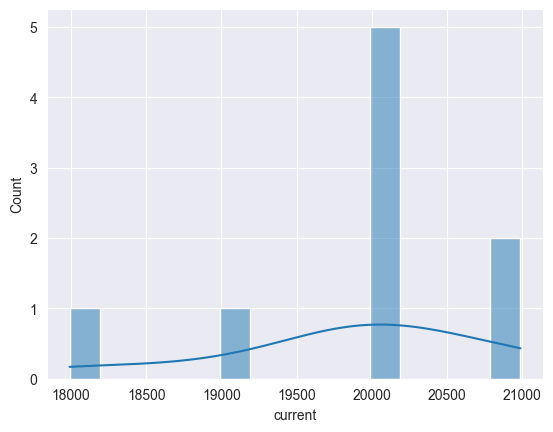

In [89]:
sns.histplot(df["current"], kde=True, bins=15)

Bar
plot - show
how
many
product
belong
to
each
type.Overview
of
which
product
types
dominate
the
market.

<Axes: xlabel='type'>

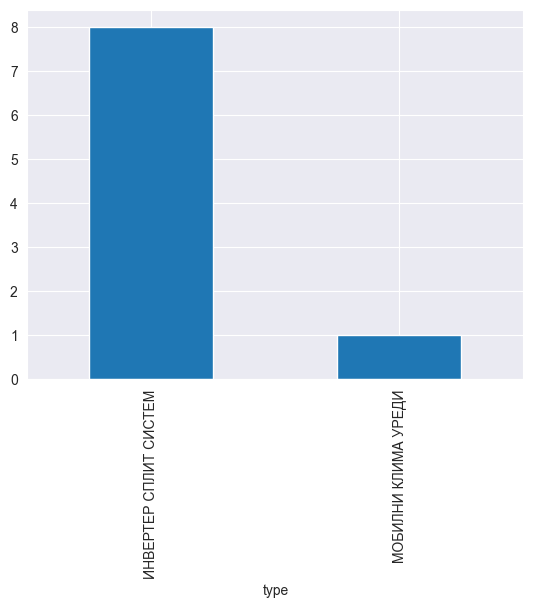

In [90]:
df["type"].value_counts().plot.bar()

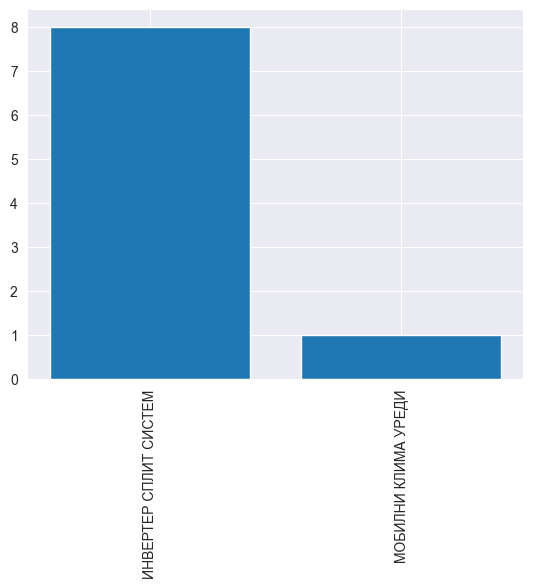

In [91]:
counts_per_type = df["type"].value_counts()
plt.bar(counts_per_type.index, counts_per_type)
plt.xticks(rotation=90)
plt.show()

Box
plot - used
to
show
how
prices
are
spread
out and detect
potential
outliers, They
summarize
the
meadian, quartiles and extremes
of
the
pricing
data.

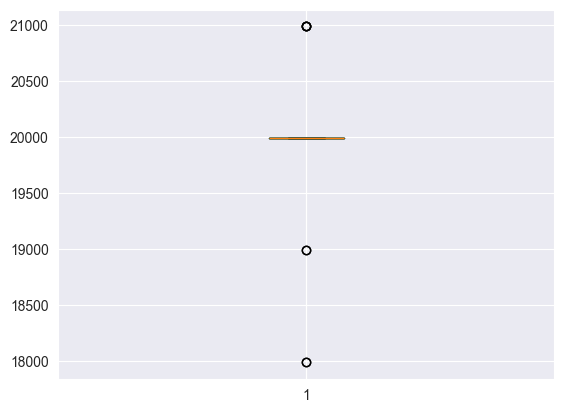

In [92]:
df["current"].plot.box()
plt.boxplot(df["current"])
plt.show()

Comparing
price
distribution
between
different
types
of
products.

<Axes: xlabel='current', ylabel='type'>

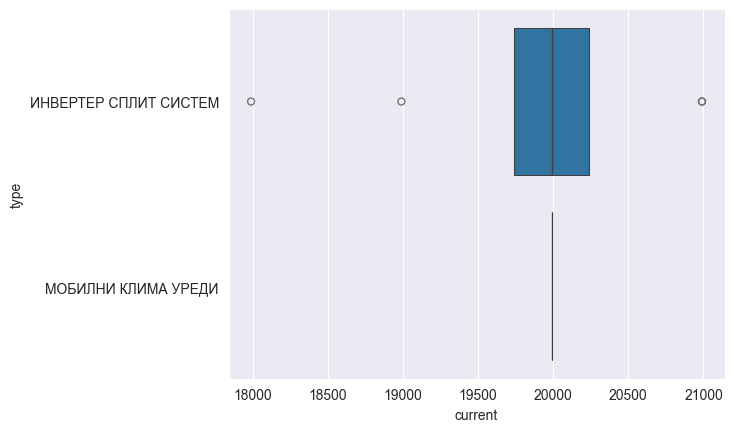

In [93]:
sns.boxenplot(df, x="current", y="type")

<Axes: xlabel='current', ylabel='manufacturer'>

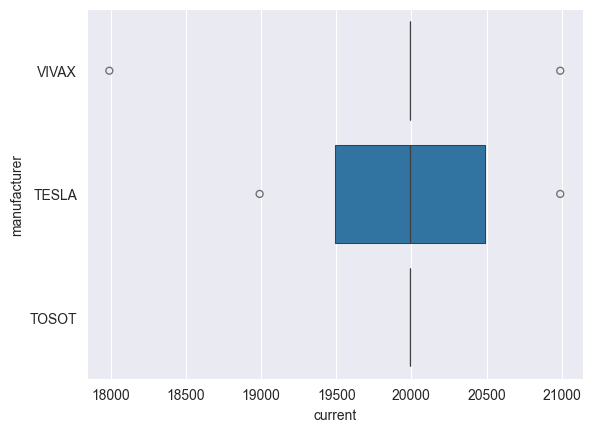

In [94]:
sns.boxenplot(df, x="current", y="manufacturer")

Scatter
plot - we
can
use
them
to
explore
possible
relationships
between
the
columns
of
the
dataframe.

<Axes: xlabel='current', ylabel='previous'>

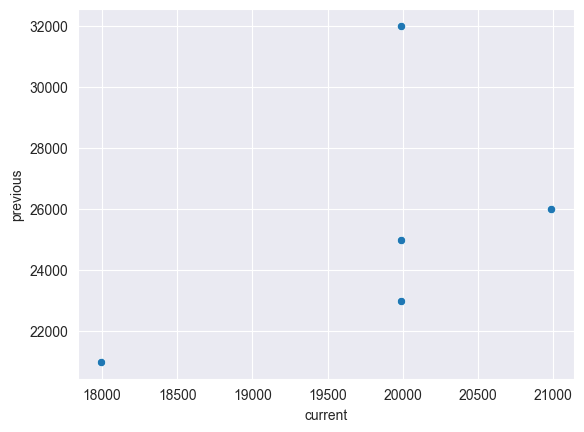

In [95]:
sns.scatterplot(df, x="current", y="previous")

Heatmap - is used
to
show
correlation
between
all
numerical
values in a
dataframe.

<Axes: >

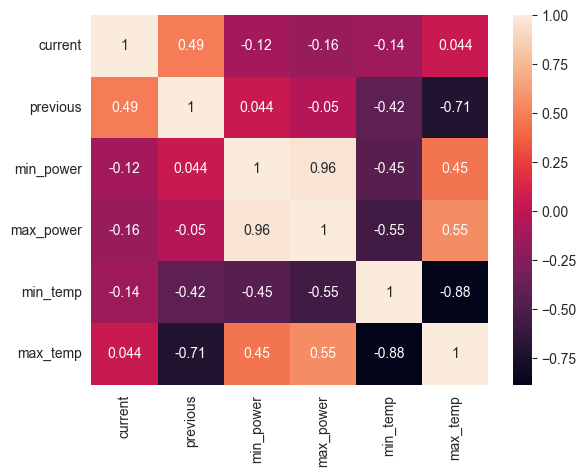

In [96]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Group
items - we
can
use
the
groupby
function
to
group
data and analize
it
by
mean, min, max and sum.We
will
group
items
by
their
type, current and previous
prices.

In [97]:
df.groupby(by=["type"])[["current", "previous"]].mean()

,current,previous
type,,
ИНВЕРТЕР СПЛИТ СИСТЕМ,19865.0,25418.571429
МОБИЛНИ КЛИМА УРЕДИ,19990.0,NaN
